# BREAST CANCER IDENTIFICATION USING DEEP LEARNING :


## PROJECT BRIEF DETAIL : 
                                     Here we require concepts of AI and DL. This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyperparameter selection.
                                     

# M - Malignant (chronic)    B - Benign (acute)


## ATTRIBUTE INFORMATION :

1. ID Number
2. Diagnosis [M-malignant, B-benign]
3. (3 - 32)
Ten real-valued features are computed for each cell nucleus

1. radius(mean of distance from centre to points on the perimeter
2. texture(standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness(local variation in radius length)
6. concavity(severity of concave portions of the contour)
7. compactness(perimeter^2 / area-1.0)
8. concave points(number of concave portions on the contour)
9. symmetry
10. fractal dimension("coastline approximation"-1)




 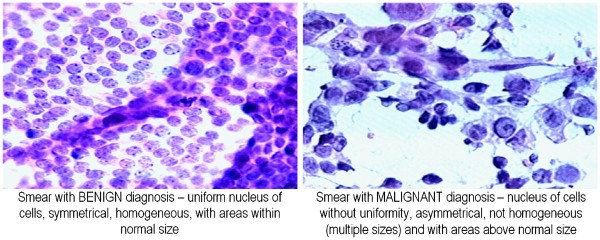

# WHAT IS BREAST CANCER ?

 *When a malignant tumor has started from the cells and tissues of the breast, it is called breast cancer.  In order to understand breast cancer, we must first learn the basics of breast anatomy. 

 *Breast cancers which start in the cells that line the ducts are called ductal cancers.  The majority of breast cancers are ductal cancers.  Those breast cancers which start in the lobules are called lobular cancers, and other breast cancers start in the stroma.

 *Once cancer cells have reached the lymph nodes, there is an increased risk that the cancer cells could enter the bloodstream.  Cancer cells in the bloodstream can cause cancer to spread or metastasize.  However, it should be noted that not all cancers which are found in lymph nodes metastasize and individuals who have no cancer cells in their lymph nodes can still have cancer metastasize later on.

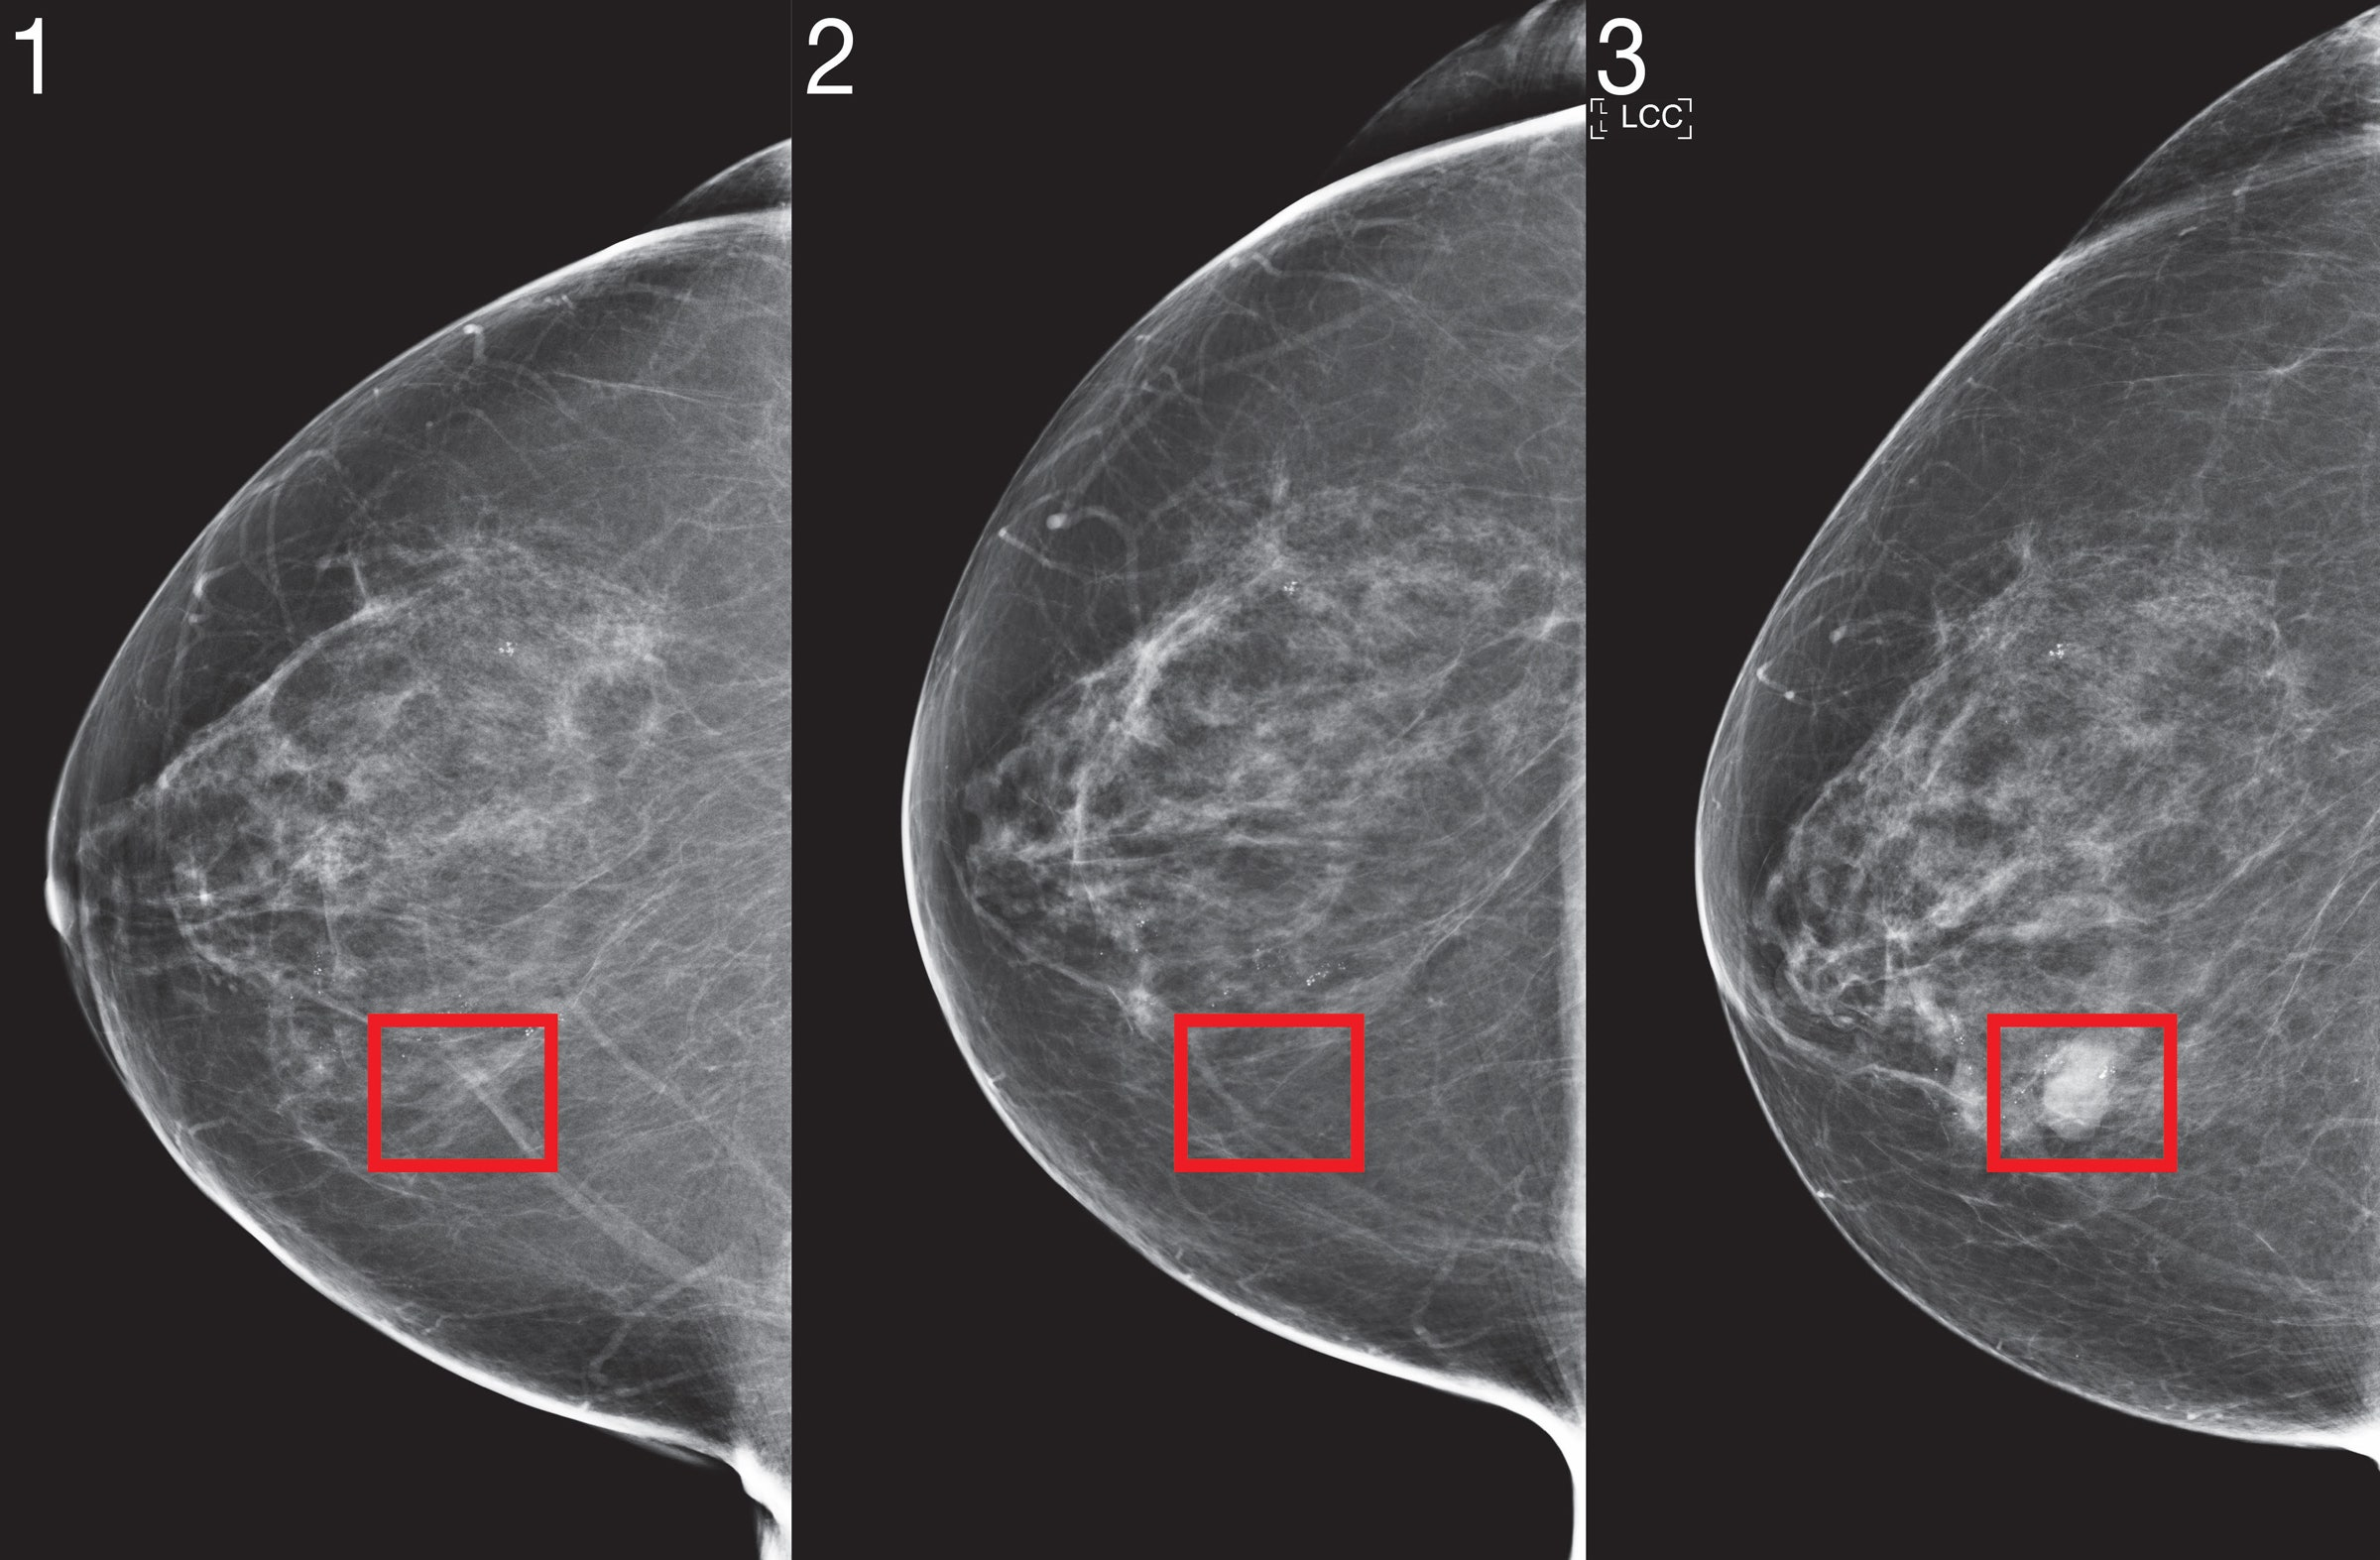

# IMPORT BASIC LIBRARIES :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# IMPORT THE BREAST CANCER DATASET:
Data = pd.read_csv("Regex Breast-Cancer Project Dataset.csv")
Data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# SHOW THE SHAPE OF THE DATASET:
Data.shape

(569, 32)

In [4]:
# FIND IS THERE IS ANY MISSING VALUES IN THE DATASET:
Data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## THERE IS NO MISSING VALUES PRESENT IN THIS DATASET...

In [5]:
# LET US DESCRIBE OUR DATASET:
Data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# PRINT THE DATA TYPE OF EACH COLUMN:
Data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## LET US CHANGE THE M & B AS M = 1, B = 0

In [7]:
# REASSIGN M & B as 1 & 0
x = Data.drop("diagnosis", axis = 1)
Data["diagnosis"] = Data["diagnosis"].map({"M":1, "B":0})
y = Data["diagnosis"]

# STANDARDIZING THE DATASET :

In [8]:
# FIRST WE NEED TO IMPORT THE STANDARD SCALAR FROM SKLEARN LIBRARY:
from sklearn.preprocessing import StandardScaler

# STANDARDIZE X DATASET:
sc = StandardScaler()
x = sc.fit_transform(x)

# SPLITTING THE DATASET INTO TRAIN, TEST :

In [9]:
# SPLIT THE DATA TRAIN AND TEST :
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)


In [10]:
# CHOOSING THE HYPERPARAMETER:
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features":["auto", "sqrt"]}

In [11]:
# IMPORTING THE MODEL
from sklearn.ensemble import RandomForestClassifier

# EXECUTING HYPERPARAMETERS:
model = RandomForestClassifier(n_jobs = -1)
rs_clf = GridSearchCV(estimator = model,
                    param_grid = grid,
                            cv = 5,
                            verbose = 2)
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, n_estimators=10, total=   3.9s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, n_estimators=200 ........

[CV] .. max_depth=5, max_features=auto, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................
[CV] . max_depth=5, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................
[CV] . max_depth=5, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................
[CV] . max_depth=5, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................
[CV] . max_depth=5, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................
[CV] . max_depth=5, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, n_estimators=200 ................
[CV] . max_depth=5, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=10, max_features=auto, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................
[CV] . max_depth=10, max_features=auto, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  

[CV] . max_depth=20, max_features=auto, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=20, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............
[CV]  

[CV]  max_depth=30, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=30, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, n_estimators=100 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=30, max_features=auto, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 100, 200, 500, 1000, 1200]},
             verbose=2)

In [12]:
rs_clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

In [29]:
Model = RandomForestClassifier(max_depth = 10,
                               max_features = "sqrt",
                               n_estimators = 200)

Model.fit(x_train, y_train)
y_preds = Model.predict(x_test)

In [30]:
# IMPORTING ACCURACY_SCORE:
from sklearn.metrics import accuracy_score

# PREDICTING THE ACCURACY OF THE TEST DATASET IN RANDOMFORESTCLASSIFIER:
print(f" {accuracy_score(y_test, y_preds) * 100}%")

 96.49122807017544%


<AxesSubplot:>

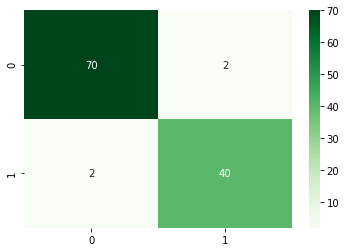

In [31]:
# VIEW THE PREDICTION IN CONFUSION MATRIX:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_preds)
conf
sns.heatmap(conf, cmap = "Greens", annot = True)

# WHAT IS PCA?

         Principal Component Analysis is an unsupervised learning algorithm that is used for the Dimentionality Reduction in machine learning.

## How PCA works?
pca is based on mathematical concepts such as:

1. variance and covariance
2. eigen values and eigen vectors

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. PCA generally tries to find the lower-dmensional surface to project the high-dimensional data    

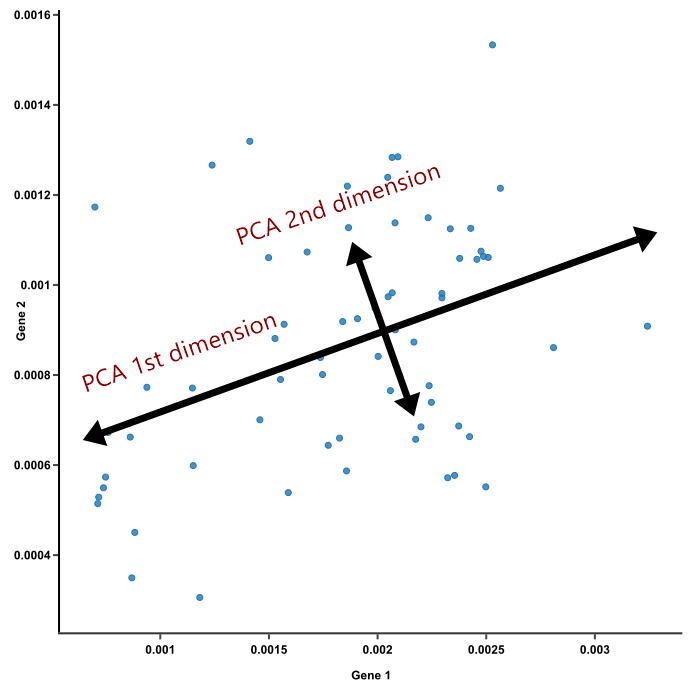



In [32]:
# IMPORTIN THE PCA:
from sklearn.decomposition import PCA

#TRAINING THE DATA WITH PCA:
pca = PCA(n_components = 200)
pca = PCA(0.9)
pca_xtrain = pca.fit_transform(x_train,y_train)

pca_test = pca.transform(x_test)



In [33]:
#ASSIGN EXPERIENCED_VARIANCE
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.42481951, 0.19477498, 0.08584054, 0.06342997, 0.05353083,
       0.03953546, 0.03279356, 0.02089419])

Text(0, 0.5, 'Second Principal Component')

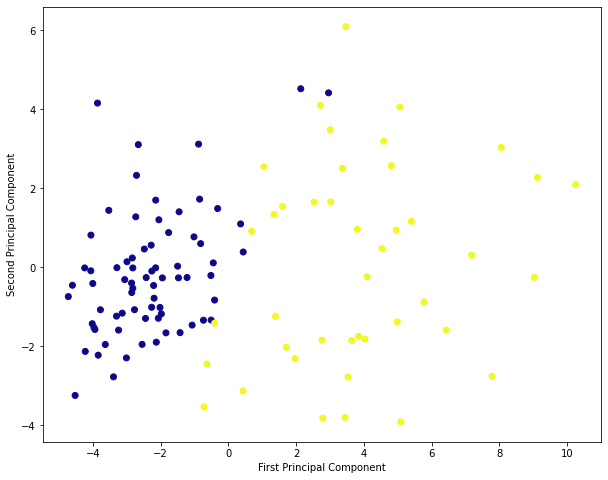

In [34]:
#VISUALIZE THE FIRST AND SECOND PRINCIPLE COMPONENTS:
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 8)) 
  
plt.scatter(pca_test[:, 0], pca_test[:, 1], c = y_preds, cmap ='plasma') 
  
# labeling x and y axes:
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')

In [35]:
grid_lg = {"penalty" : ["l1", "l2", "l3", "l4"],
        "C" : [1.0],
        "intercept_scaling" : [1, 2, 3 ,4 ],
        "max_iter" : [25, 50, 75, 100]}

In [36]:
# IMPORT LOGISTIC REGRESSION:
from sklearn.linear_model import LogisticRegression

# IMPLEMENT THE PCA COMPONENTS IN LOGISTIC REGRESSION:
lg = LogisticRegression(n_jobs = -1,
                        max_iter = 10,
                        random_state = 0)

rs_lg = GridSearchCV(estimator = lg,
                    param_grid = grid_lg,
                            cv = 5,
                            verbose = 2)

rs_lg.fit(pca_xtrain, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l1 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l1, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l1 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l1, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l1 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l1, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l1 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l1, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l1 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l1, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l2 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimato

[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l2, total=   1.8s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l2, total=   1.1s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l2, total=   1.2s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l2, total=   1.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=25, penalty=l3 ......

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\

[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=1, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=1, max_iter=75, penalty=l3 ......

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\

[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=25, penalty=l3 ......

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\


[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=2, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=2, max_iter=75, penalty=l3, total

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\

[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=25, penalty=l3 ......

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l4.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\

[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=3, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=3, max_iter=75, penalty=l3 ......

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\


[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=25, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=25, penalty=l3 .....

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\


[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l2 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l2, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l3, total=   0.0s
[CV] C=1.0, intercept_scaling=4, max_iter=75, penalty=l3 .............
[CV]  C=1.0, intercept_scaling=4, max_iter=75, penalty=l3, total

C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py", line 438, in _check_solver
    raise ValueError("Logistic Regression supports only penalties in %s,"
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l3.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Admin\

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10, n_jobs=-1,
                                          random_state=0),
             param_grid={'C': [1.0], 'intercept_scaling': [1, 2, 3, 4],
                         'max_iter': [25, 50, 75, 100],
                         'penalty': ['l1', 'l2', 'l3', 'l4']},
             verbose=2)

In [37]:
rs_lg.best_params_

{'C': 1.0, 'intercept_scaling': 1, 'max_iter': 25, 'penalty': 'l2'}

In [38]:
Lg = LogisticRegression(n_jobs = -1,
                        max_iter = 25,
                        random_state = 0,
                        penalty = "l2",
                        intercept_scaling = 1,
                        C = 1.0)

Lg.fit(pca_xtrain,y_train)

# PREDICT THE PCA_TEST DATA
Lg_preds = Lg.predict(pca_test)

In [39]:
# ACCURACY OF LG_PREDS AND Y_TEST DATA:
print(f" {accuracy_score(y_test, Lg_preds) * 100}%")

 97.36842105263158%


<AxesSubplot:>

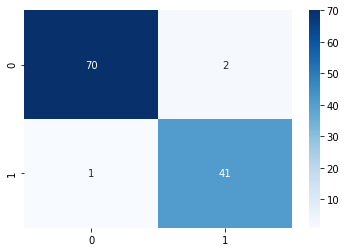

In [40]:
#CONFUSION MATRIX:
conf = confusion_matrix(y_test, Lg_preds)
conf
sns.heatmap(conf, cmap = "Blues", annot = True)

In [41]:
# IMPLEMENTING PCA IN RANDOMFORESTCLASSIFIER:
RCF = RandomForestClassifier(max_depth = 20,
                               max_features = "auto",
                               n_estimators = 10)

RCF.fit(pca_xtrain, y_train)
RCF_preds = RCF.predict(pca_test)

# PREDICTION:
print(f" {accuracy_score(y_test, RCF_preds) * 100}%")


 94.73684210526315%


<AxesSubplot:>

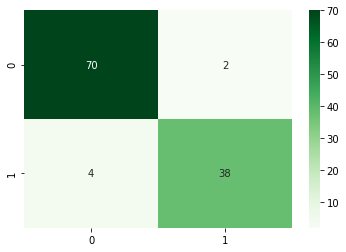

In [42]:
#CONFUSION MATRIX:
conf = confusion_matrix(y_test, RCF_preds)
conf
sns.heatmap(conf, cmap = "Greens", annot = True)

# COMPARING THE RANDOM FOREST CLASSIFIER AND LOGISTIC REGRESSION PREDICTION USING PRINCIPLE COMPONENT ANALYSIS:


## VISUALIZING THE DIFFERENCE IN CONFUSION MATRIX CHARTS:

## 1. LOGISTIC REGRESSION PREDICTION  

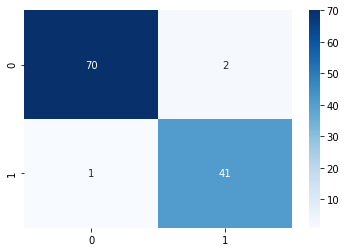

## 2. RANDOM FOREST CLASSIFIER PREDICTION

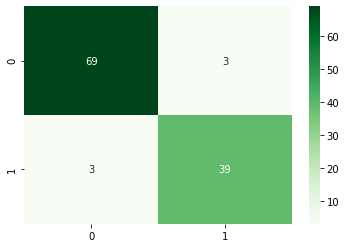